In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

path = "C:\\Users\\gushi\\Projects\\ML_Project1\\Data\\coalbumps.csv"
data = pd.read_csv(path)
data = data.sample(frac=1)
data.head()
print(data.shape)

(2584, 19)


In [2]:
train_sizes = list(range(1,2060,100))



In [3]:
categorical = ["SeismicHazard", "SeismoacousticHazard", "SeismicHazardAssessment", "ShiftType"]
for cats in categorical:
    try:
        dummed = pd.get_dummies(data[cats], prefix = cats)
        data = data.drop(cats, axis=1)
        data = data.join(dummed)
    except KeyError:
        pass


In [4]:
from sklearn.model_selection import learning_curve
from sklearn import tree
from imblearn.over_sampling import RandomOverSampler

target = 'CurrentShiftHazard'
features = [feature for feature in list(data.head(0)) if feature != target]

ros = RandomOverSampler()
X, y = ros.fit_sample(data[features], data[target])

train_sizes, train_scores, validation_scores = learning_curve(estimator = tree.DecisionTreeClassifier(max_depth=10), X=X,
                                                             y=y, train_sizes=train_sizes, cv=5, scoring='f1', shuffle=True)


C:\Users\gushi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\gushi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [5]:
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)


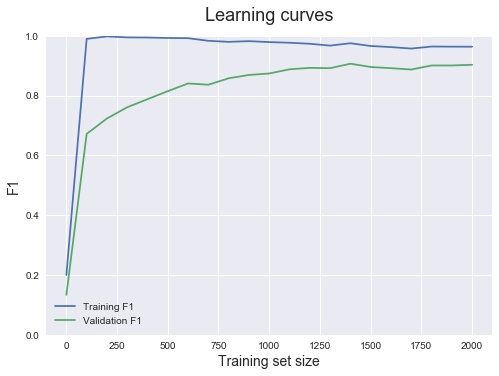

In [8]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('seaborn')


def plot_learning_curve(train_sizes, train_scores_mean, validation_scores_mean):
    plt.plot(train_sizes, train_scores_mean, label = 'Training F1')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation F1')
    plt.ylabel('F1', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title('Learning curves', fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0,1)

plot_learning_curve(train_sizes, train_scores_mean, validation_scores_mean)

C:\Users\gushi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\gushi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\gushi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


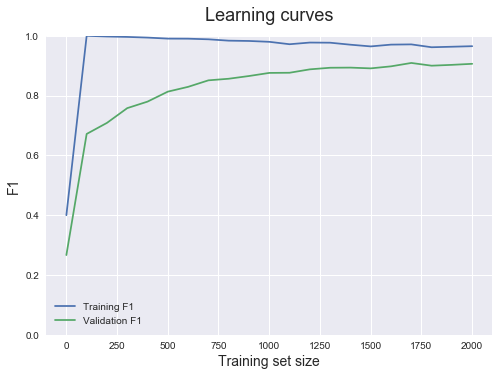

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

train_sizes, train_scores, validation_scores = learning_curve(estimator = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(20,20), random_state=1),
                                                              X=X, y=y, train_sizes=train_sizes, cv=5, scoring='f1', shuffle=True)

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

plot_learning_curve(train_sizes, train_scores_mean, validation_scores_mean)